# Практическая работа 1-3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

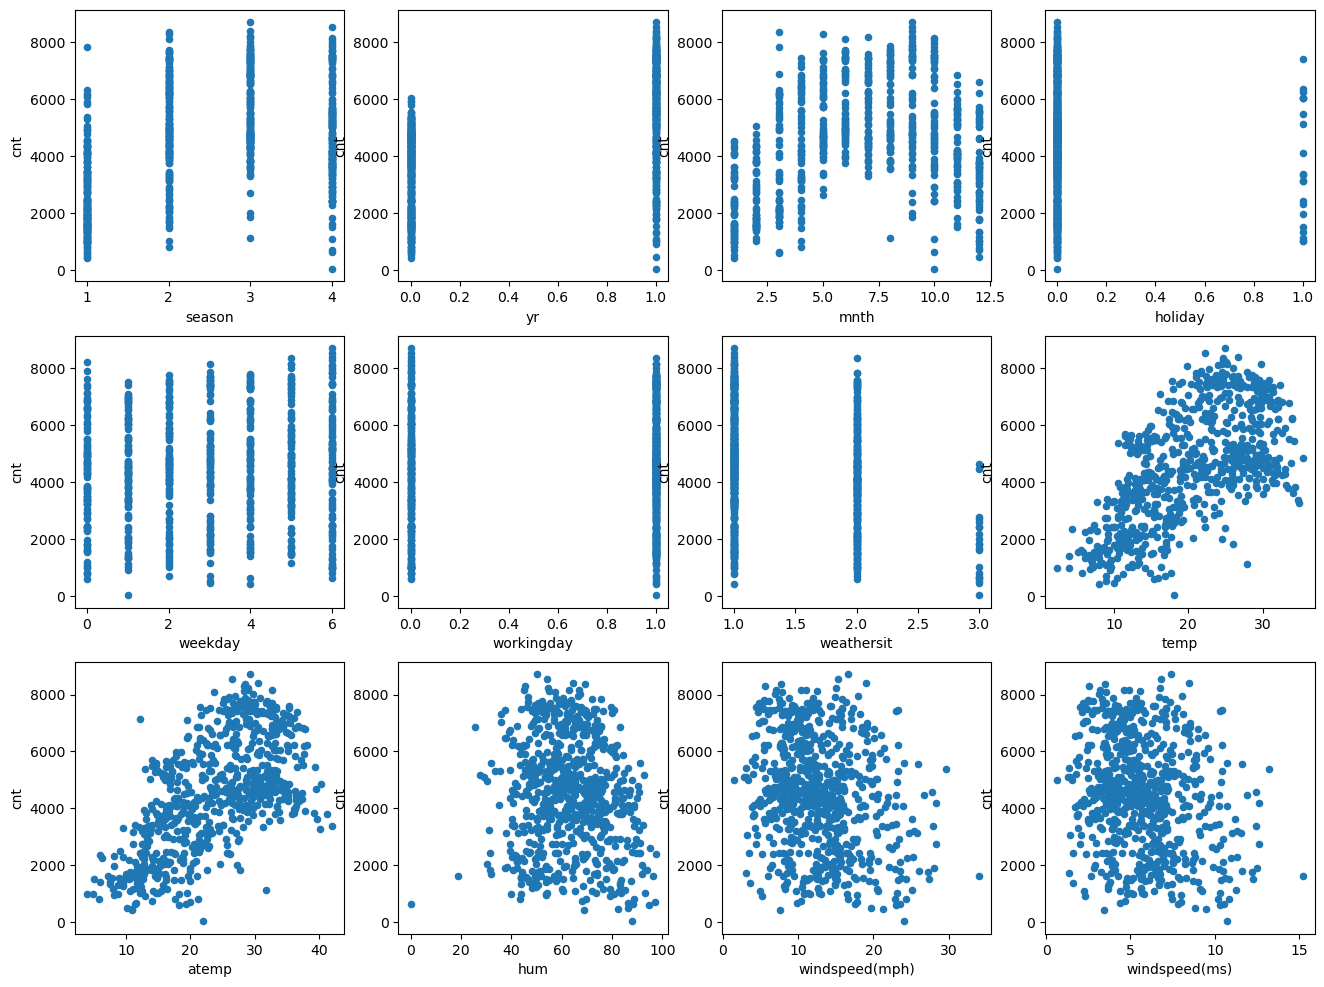

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: характер - обратная парабола, от первого месяца до середины идет возрастание, потом от середины года до конца - убывание (все нелинейно!)

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: явной линейной связи нигде нет, близкие - имеющие хоть какой-то тренд: temp, atemp

## 2. Корреляционная матрица 

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ 

меньше всего:

    hum               0.100659
    holiday           0.068348
    weekday           0.067443
    workingday        0.061156

больше всего:

    atemp             0.631066
    temp              0.627494
    yr                0.566710
    season            0.406100

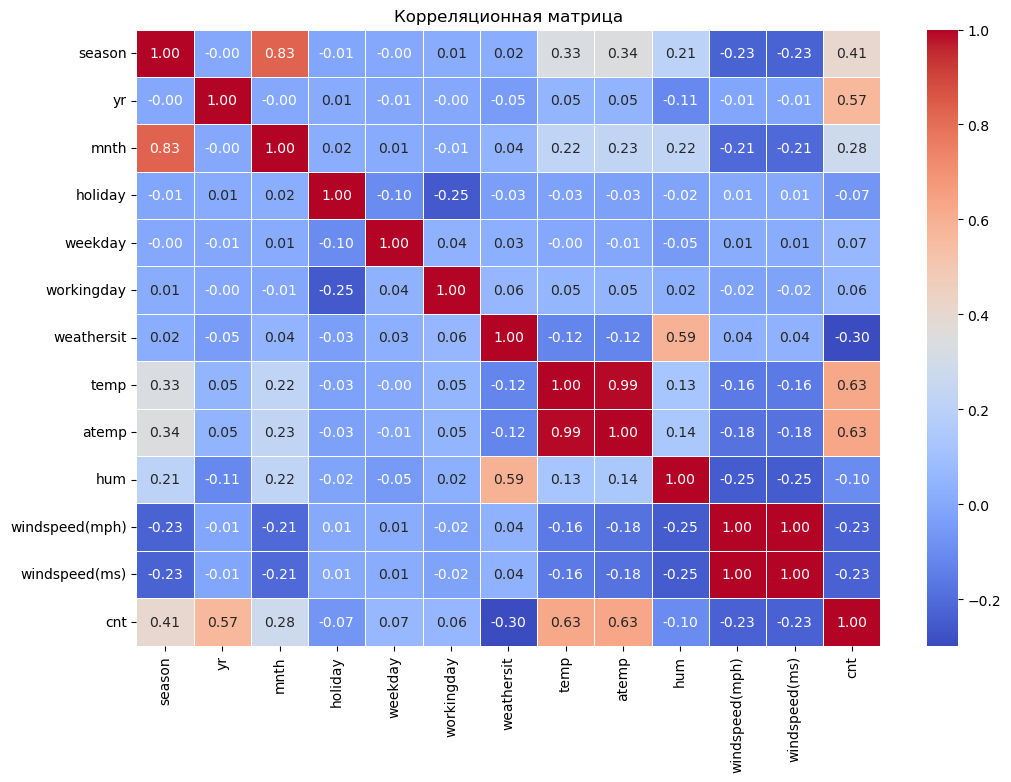

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [8]:
sorted_corr_with_cnt = correlation_matrix['cnt'].abs().sort_values(ascending=False)
sorted_corr_with_cnt

cnt               1.000000
atemp             0.631066
temp              0.627494
yr                0.566710
season            0.406100
weathersit        0.297391
mnth              0.279977
windspeed(ms)     0.234545
windspeed(mph)    0.234545
hum               0.100659
holiday           0.068348
weekday           0.067443
workingday        0.061156
Name: cnt, dtype: float64

## 3. Barpot 

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: в новом году идет увеличчение в каждый месяц года, эта закономерность и оказывает влияние на целевой признак, что и отражается в высокой корреляции между этими двумя признаками

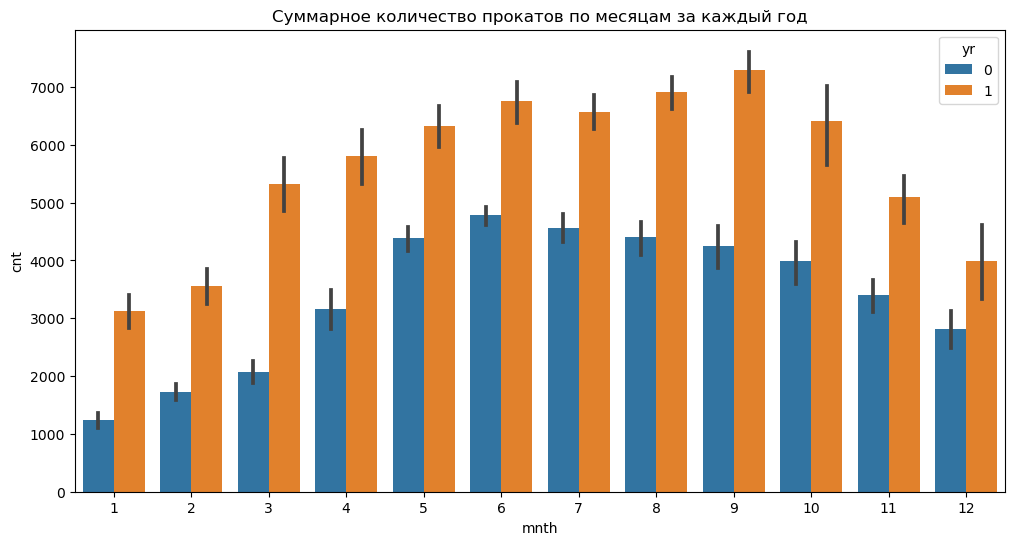

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', hue='yr', data=df)
plt.title('Суммарное количество прокатов по месяцам за каждый год')
plt.show()

## 4. Countplot 

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: бралось примерно одинаковое измерений замеров каждый день
    
Ответ: распределение называется равномерное

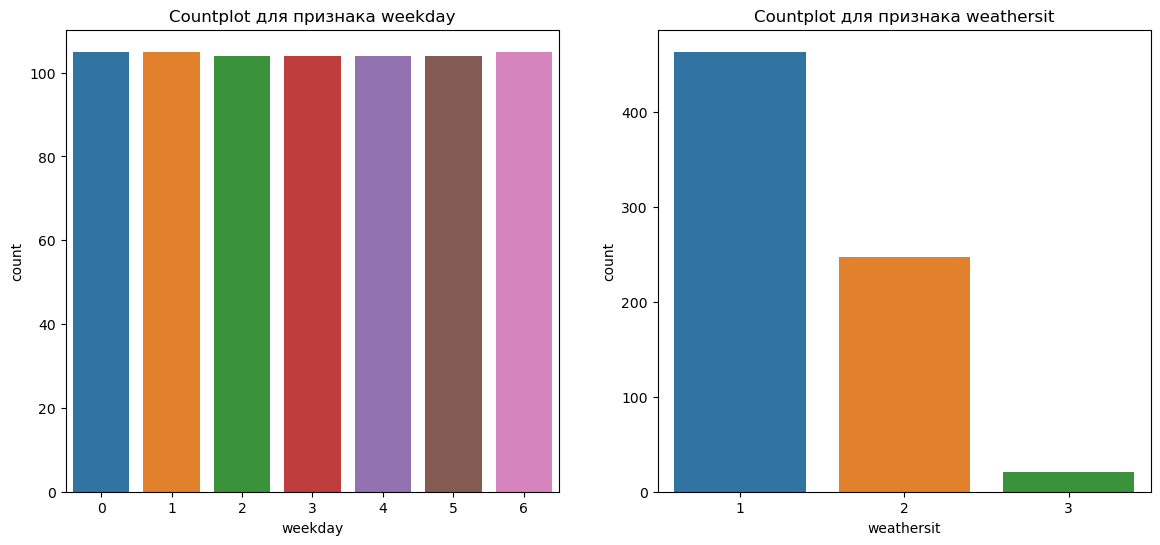

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='weekday', data=df)
plt.title('Countplot для признака weekday')

plt.subplot(1, 2, 2)
sns.countplot(x='weathersit', data=df)
plt.title('Countplot для признака weathersit')

plt.show()

## 5. Распределение 

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: основываясь на графике прокатов +- 20

Ответ: данное распределение называется симметричным

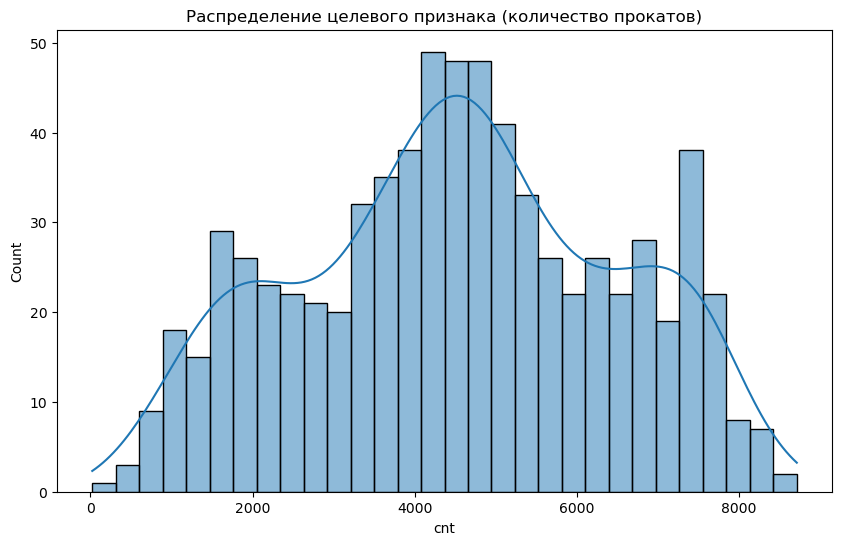

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Распределение целевого признака (количество прокатов)')
plt.show()

## 6. Совместное распределение признаков 

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: ничего не настораживает, температура и ощущение температуры имеют линейную зависимость, в этом ничего странного нет

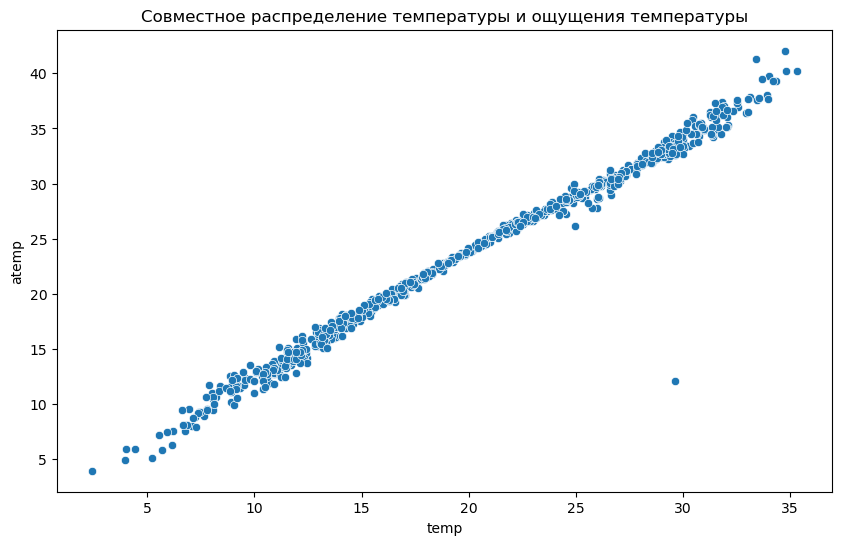

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='atemp', data=df)
plt.title('Совместное распределение температуры и ощущения температуры')
plt.show()

## 7. Ящик с усами 

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: возможно, это связано с сезонными изменениями и характером погоды в разные месяцы; чаще в будни - апрель, май, июнь

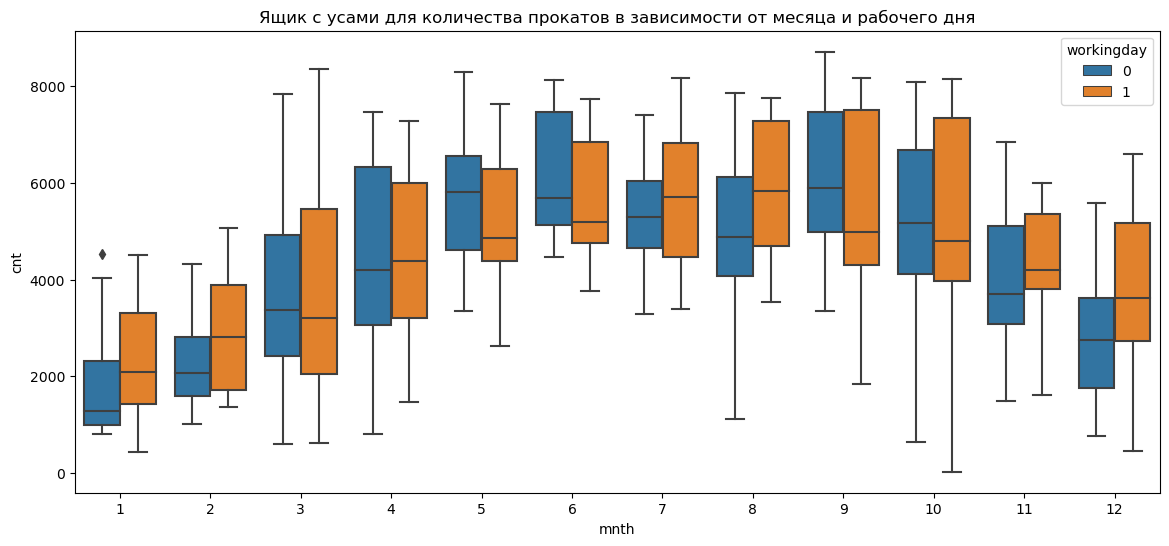

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Ящик с усами для количества прокатов в зависимости от месяца и рабочего дня')
plt.show()

## 8. Хитрый вопрос 

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: создали переменную, в нее кладем разницу ощущается - на_самом_деле, строим точечный график зависимости нового признака от скорости ветра и видим, что разница ощущается - на_самом деле сильно не меняется, а наоборот стремится даже к нулю, то есть при сильном ветре, человек ощущает такую температуру, какая она на самом деле на улице

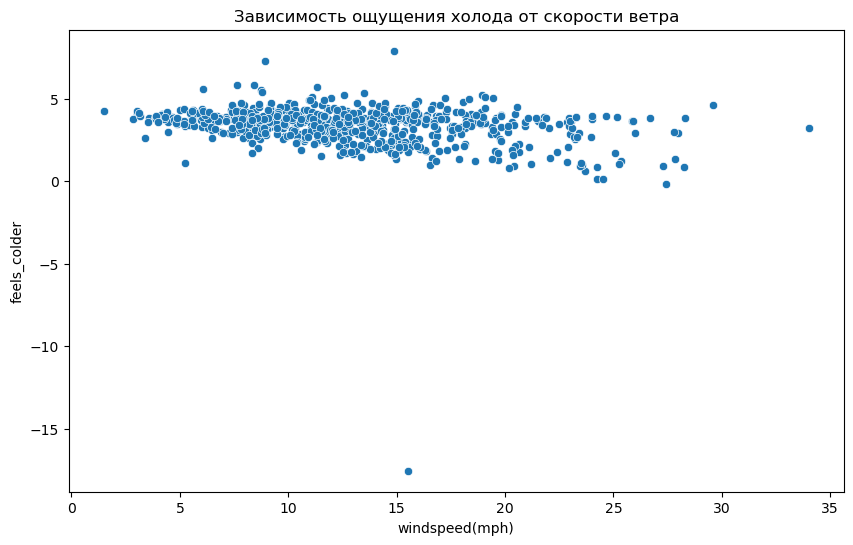

In [17]:
df['feels_colder'] = df['atemp'] - df['temp']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed(mph)', y='feels_colder', data=df)
plt.title('Зависимость ощущения холода от скорости ветра')
plt.show()